In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from numpy.random import seed
seed(42)

import tensorflow
tensorflow.random.set_seed(42)

In [3]:
import os
import pandas as pd
import math
import numpy as np

### Dataframes

In [4]:
REPOSITORY_PREFIX = 'https://raw.githubusercontent.com/RonildoSilva/datasets/main/'

In [5]:
# SFZ - Solicitacao inscricao
df_train = pd.read_csv(REPOSITORY_PREFIX+'df_train_keras_tk_sol_ic_prefix.csv')
df_val = pd.read_csv(REPOSITORY_PREFIX+'df_val_keras_tk_sol_ic_prefix.csv')
df_test = pd.read_csv(REPOSITORY_PREFIX+'df_test_keras_tk_sol_ic_prefix.csv')

In [6]:
df_train.columns

Index(['CaseID', 'Activity', 'Duration', 'Timestamp', 'Duration Float',
       'Time to conclusion', 'Passed Time', 'Step', 'Prefix', 'Activity Cat'],
      dtype='object')

In [7]:
print(df_train.shape[0], df_val.shape[0], df_test.shape[0])

23180 7845 7713


In [8]:
#df_train = df_train.rename(columns={"Time to conclusion": "TimeConclusion", "CaseID": "Case ID", "Passed Time": "PassedTime"})
#df_val = df_val.rename(columns={"Time to conclusion": "TimeConclusion", "CaseID": "Case ID", "Passed Time": "PassedTime"})
#df_test = df_test.rename(columns={"Time to conclusion": "TimeConclusion", "CaseID": "Case ID", "Passed Time": "PassedTime"})

In [9]:
df_train = df_train[df_train['Time to conclusion'] != 0]
df_val = df_val[df_val['Time to conclusion'] != 0]
df_test = df_test[df_test['Time to conclusion'] != 0]

569 299 304


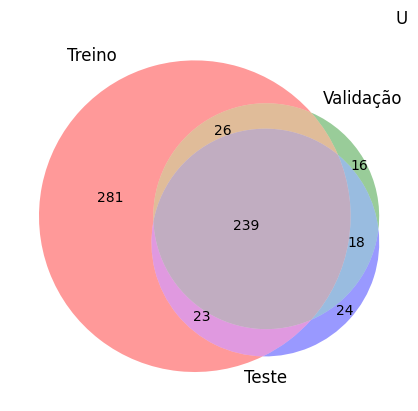

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set_train = set(df_train['Activity Cat'].unique())
set_val = set(df_val['Activity Cat'].unique())
set_test = set(df_test['Activity Cat'].unique())

print(
    len(set_train),
    len(set_val),
    len(set_test)
)

z = set_test.intersection(set_val).intersection(set_train)

w = set_train.intersection(set_val).difference(z)
x = set_val.intersection(set_test).difference(z)
y = set_test.intersection(set_train).difference(z)

a = set_train.difference(w.union(z).union(y))
b = set_val.difference(w.union(x).union(z))
c = set_test.difference(z.union(x).union(y))


l_a = len(a)
l_b = len(b)
l_c = len(c)
l_w = len(w)
l_x = len(x)
l_z = len(z)
l_y = len(y)

# Make the diagram
venn3(subsets = (l_a, l_b, l_w, l_c, l_y,l_x, l_z),
      set_labels = ('Treino', 'Validação', 'Teste'))
plt.title('U', loc='right')

plt.savefig('sol_a25_venn.pdf', bbox_inches='tight')
plt.show()

from google.colab import files
files.download('sol_a25_venn.pdf')

In [11]:
print(df_train['Time to conclusion'].std(),
df_val['Time to conclusion'].std(),
df_test['Time to conclusion'].std())

42.31159172979721 23.211399557156334 24.97866947016909


In [ ]:
#len(df_test['Case ID'].unique())

In [ ]:
MAX_LEN_TRACE_TRAIN = df_train['Step'].max()

In [ ]:
df_test['Step'].max()

21

### Features extraction

In [ ]:
from keras.preprocessing.text import Tokenizer

### Features selection

In [ ]:
MAX_LEN = max(max(df_train['Step']),max(df_val['Step']),max(df_test['Step']))

In [ ]:
df_prefix_train = df_train['Prefix'].str.split(',', expand = True)
col = df_prefix_train.shape[1]
for i in range(MAX_LEN - df_prefix_train.shape[1]):
    df_prefix_train.insert(df_prefix_train.shape[1], col+i, None)
    #print(i)

In [ ]:
df_prefix_val = df_val['Prefix'].str.split(',', expand = True)
col = df_prefix_val.shape[1]
for i in range(MAX_LEN - df_prefix_val.shape[1]):
    df_prefix_val.insert(df_prefix_val.shape[1], col+i, None)
    #print(i)

In [ ]:
df_prefix_test = df_test['Prefix'].str.split(',', expand = True)
col = df_prefix_test.shape[1]
for i in range(MAX_LEN - df_prefix_test.shape[1]):
    df_prefix_test.insert(df_prefix_test.shape[1], col+i, None)
    #print(i)

In [ ]:
df_prefix_train = df_prefix_train.fillna('')
df_prefix_val = df_prefix_val.fillna('')
df_prefix_test = df_prefix_test.fillna('')

In [ ]:
tokenize_mode = 'sequences_to_matrix'

In [ ]:
kerasTokenizer = Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=",")


train_txt = df_train['Activity'].values
val_txt = df_val['Activity'].values
test_txt = df_test['Activity'].values

kerasTokenizer.fit_on_texts(train_txt)

train_sequences = kerasTokenizer.texts_to_sequences(train_txt)
val_sequences = kerasTokenizer.texts_to_sequences(val_txt)
test_sequences = kerasTokenizer.texts_to_sequences(test_txt)

train_matrix = kerasTokenizer.texts_to_matrix(train_txt, mode='binary')
val_matrix = kerasTokenizer.texts_to_matrix(val_txt, mode='binary')
test_matrix = kerasTokenizer.texts_to_matrix(test_txt, mode='binary')


train_sequences_matrix = kerasTokenizer.sequences_to_matrix(train_sequences, mode='binary')
val_sequences_matrix = kerasTokenizer.sequences_to_matrix(val_sequences, mode='binary')
test_sequences_matrix = kerasTokenizer.sequences_to_matrix(test_sequences, mode='binary')

Text to sequences

In [ ]:
df_train_sequences = pd.DataFrame(train_sequences).fillna(0).astype(int)
col = df_train_sequences.shape[1]
for i in range(MAX_LEN - df_train_sequences.shape[1]):
    df_train_sequences.insert(df_train_sequences.shape[1], col+i, 0)
    #print(i)


df_test_sequences = pd.DataFrame(test_sequences).fillna(0).astype(int)
col = df_test_sequences.shape[1]
for i in range(MAX_LEN - df_test_sequences.shape[1]):
    df_test_sequences.insert(df_test_sequences.shape[1], col+i, 0)
    #print(i)

df_val_sequences = pd.DataFrame(val_sequences).fillna(0).astype(int)
col = df_val_sequences.shape[1]
for i in range(MAX_LEN - df_val_sequences.shape[1]):
    df_val_sequences.insert(df_val_sequences.shape[1], col+i, 0)
    #print(i)


In [ ]:
if(tokenize_mode == 'sequences_to_matrix'):
    X_train = np.concatenate((df_train[['Step', 'Duration Float', 'Passed Time']].values,
                              train_sequences_matrix), axis=1)
    y_train = df_train[['Time to conclusion']].values

    X_test = np.concatenate((df_test[['Step', 'Duration Float', 'Passed Time']].values,
                             test_sequences_matrix), axis=1)
    y_test = df_test[['Time to conclusion']].values


    X_val = np.concatenate((df_val[['Step', 'Duration Float', 'Passed Time']].values,
                            val_sequences_matrix), axis=1)
    y_val = df_val[['Time to conclusion']].values

In [ ]:
X_train_ml = np.concatenate((X_train, X_val), axis=0)
y_train_ml = np.concatenate((y_train, y_val), axis=0)

In [ ]:
print(X_train.shape)

(19496, 112)


In [ ]:
print(X_train_ml.shape)

(26113, 112)


### ML Experiment

In [ ]:
! pip install lightgbm
! pip install xgboost

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
import lightgbm as ltb

regressors = [
        {'nome' : 'DummyRegressor', 'regressor':  DummyRegressor(strategy='mean')},
        {'nome': 'LinearRegression', 'regressor': LinearRegression(fit_intercept=False)},
        {'nome': 'RandomForestRegressor',  'regressor': RandomForestRegressor(n_estimators=20, max_features='auto',
                                                                              bootstrap=True, warm_start=True, max_depth=19, random_state=0)},
        {'nome' : 'XGBoostRegressor', 'regressor': XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)},
        {'nome' : 'LightGBM Regressor', 'regressor': ltb.LGBMRegressor(random_state=0)}
]

In [ ]:
import numpy as np
import scipy.stats as st

import time
from sklearn.metrics import mean_absolute_error
from google.colab import files

cols = [
        'Nome do modelo', 'MAE', 'CI'
       ]

data_result = []

if(2 > 3):
  for regressor in regressors:
      t1 = time.time()
      if(regressor['nome'] == 'LightGBM Regressor'):
        regr = regressor['regressor'].fit(X_train_ml, y_train_ml, categorical_feature=[i for i in range(0,MAX_LEN_TRACE_TRAIN+1)])
      else:
        regr = regressor['regressor'].fit(X_train_ml, y_train_ml)
      tf = time.time()

      y_pred = regr.predict(X_test)
      mae = mean_absolute_error(y_test, y_pred)

      y_t = []

      for t in y_test:
        cur_t = str(t)
        str_v = cur_t.replace('[','')
        str_v = str_v.replace(']','')
        y_t.append(float(str_v))


      int_conf = ci(abs(y_t - np.squeeze(y_pred)))

      line = [
          regressor['nome'],
          mae,
          int_conf
      ]

      data_result.append(line)

      df_results = pd.DataFrame(list(zip(y_test, np.squeeze(y_pred))),columns =['y_test', 'y_pred'])
      df_results.to_csv('Baseline SOL_INSC_'+regressor['nome']+'.csv', index=False)
      files.download('Baseline SOL_INSC_'+regressor['nome']+'.csv')

  pd.DataFrame(data_result, columns=cols).sort_values(by='MAE', ascending=True).to_csv('Baseline SOL_INSC_.csv')
  files.download('Baseline SOL_INSC_.csv')

### Deep learning Experiment

Deep learning model definition

In [ ]:
#! pip install keras_self_attention

In [ ]:
#from keras_self_attention import SeqSelfAttention

In [ ]:
import keras

from tensorflow import keras
import tensorflow as tf

from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import PReLU
from keras.layers import BatchNormalization
from keras.layers import Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Masking

from tensorflow.keras.layers import concatenate

from keras.utils import plot_model
from keras.utils import model_to_dot

from keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback


from keras.layers import Activation
from keras.initializers import Constant

from keras.regularizers import l2

In [ ]:
df_train['Step'].max()

24

In [ ]:
df_val['Step'].max()

18

In [ ]:
df_test['Step'].max()

21

In [ ]:
TIME_COLS = ['Duration Float', 'Passed Time', 'Step']

In [ ]:
dl_x_train = train_sequences_matrix
dl_x_val = val_sequences_matrix
dl_x_test = test_sequences_matrix

In [ ]:
dl_x_t_train = df_train[TIME_COLS].values
dl_x_t_val = df_val[TIME_COLS].values
dl_x_t_test = df_test[TIME_COLS].values

In [ ]:
dl_x_train = dl_x_train.reshape(dl_x_train.shape[0], dl_x_train.shape[1], 1)
dl_x_val = dl_x_val.reshape(dl_x_val.shape[0], dl_x_val.shape[1], 1)
dl_x_test = dl_x_test.reshape(dl_x_test.shape[0], dl_x_test.shape[1], 1)

In [ ]:
dl_x_t_train = dl_x_t_train.reshape(dl_x_t_train.shape[0], dl_x_t_train.shape[1], 1)
dl_x_t_val = dl_x_t_val.reshape(dl_x_t_val.shape[0], dl_x_t_val.shape[1], 1)
dl_x_t_test = dl_x_t_test.reshape(dl_x_t_test.shape[0], dl_x_t_test.shape[1], 1)

In [ ]:
print(dl_x_train.shape, dl_x_t_train.shape)

(19496, 109, 1) (19496, 3, 1)


In [ ]:
n_activities = len(pd.concat([df_train, df_val, df_test], ignore_index=True)['Activity Cat'].unique())

In [ ]:
n_activities

627

In [ ]:
shape = train_sequences_matrix.shape[1]
shape_t = len(TIME_COLS)

- input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
- output_dim: Integer. Dimension of the dense embedding.


In [ ]:
! pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=77008d8a5894d311f439430f284dee95bfe2371b4a4a71706ce9147e2b11dd6e
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


In [ ]:
from keras_self_attention import SeqSelfAttention

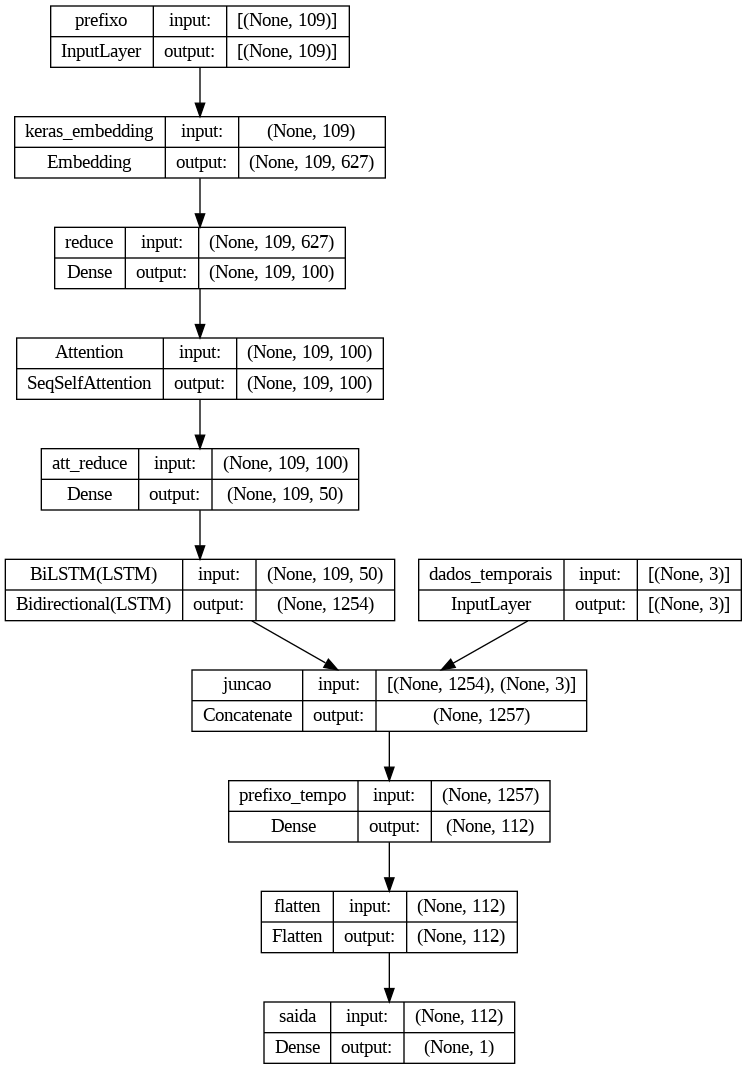

In [ ]:
seq_length = shape
seq_length_t = shape_t

input_dim = n_activities + 1

activity_input = Input(shape=(seq_length,), name='prefixo')
time_input = Input(shape=(shape_t,), name='dados_temporais')

embedding_size = n_activities

embedding = Embedding(output_dim=embedding_size,
                      input_dim=input_dim,
                      input_length=seq_length,
                      name='keras_embedding')(activity_input)

#
embedding = Dense(100, name='reduce')(embedding)

att = SeqSelfAttention(
    attention_width=embedding_size,
    attention_activation='relu',
    name='Attention')(embedding)

#
att = Dense(50, name='att_reduce')(att)

rnn = Bidirectional(LSTM(embedding_size,
                            dropout=0.1,
                            recurrent_dropout=0.1,
                            kernel_regularizer=keras.regularizers.l2(0.01), name='LSTM'),
                       name='BiLSTM')(att)


x = concatenate([rnn, time_input], name='juncao')

x = Dense((seq_length + seq_length_t),
          activation='relu',
          name='prefixo_tempo')(x)

x = Flatten()(x)
x = Dense(1, activation='linear', name='saida')(x)

model = Model(inputs=[activity_input , time_input], outputs=[x])

#model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
nadam = keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.7, beta_2=0.9, epsilon=1e-07, name="Nadam")

adam = keras.optimizers.Nadam(learning_rate=0.01, epsilon=0.01)

model.compile(
    optimizer=nadam,
    loss="mean_absolute_error",
    metrics=["mean_absolute_error"]
)

es = EarlyStopping(monitor='mean_absolute_error',
                   min_delta=1e-07, #min_delta=1e-04,
                   patience=10, verbose=1)

history = model.fit([dl_x_train, dl_x_t_train], y_train,
                    epochs=150,
                    batch_size=600,
                    callbacks=[TqdmCallback(verbose=0), es],
                    validation_data=[[dl_x_val, dl_x_t_val], y_val],
                    verbose=0)

0epoch [00:00, ?epoch/s]

Loss

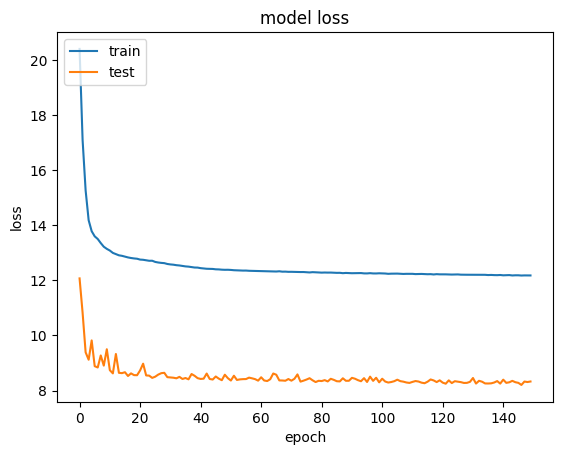

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_predicton = model.predict([dl_x_test,dl_x_t_test])

203/203 [==============================] - 14s 68ms/step


In [ ]:
test_predicton.shape

(6485, 1)

In [ ]:
y_test.shape

(6485, 1)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae_error = mean_absolute_error(y_test, test_predicton)

In [ ]:
mae_error

8.895204275989306

In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
y_t = []

for t in y_test:
  cur_t = str(t)
  str_v = cur_t.replace('[','')
  str_v = str_v.replace(']','')
  y_t.append(float(str_v))

int_conf = mean_confidence_interval(abs(y_t - np.squeeze(test_predicton)))

print('ci: ' , mae_error, int_conf)

ci:  8.895204275989306 (8.895204275989306, 8.532338676914815, 9.258069875063796)


CSV resultados pred x real

In [ ]:
from google.colab import files

df_results = pd.DataFrame(list(zip(y_test, np.squeeze(test_predicton))),columns =['y_test', 'y_pred'])
df_results.to_csv('A) SOL_INSC_SA_BiLSTM_PRED_REAL.csv', index=False)

files.download('A) SOL_INSC_SA_BiLSTM_PRED_REAL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Avaliação por etapa

In [ ]:
MAX_STEP = df_test['Step'].max()

In [ ]:
MAX_STEP

21

In [ ]:
df_test['Step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [ ]:
df_full_test = pd.DataFrame(dl_x_test.reshape(dl_x_test.shape[0], (dl_x_test.shape[1]*dl_x_test.shape[2])))
df_full_test['Step'] = df_test['Step']
df_full_test['Time to conclusion'] = df_test['Time to conclusion']

In [ ]:
dl_full_t_test = pd.DataFrame(dl_x_t_test.reshape(dl_x_t_test.shape[0], (dl_x_t_test.shape[1]*dl_x_t_test.shape[2])))
dl_full_t_test['Step'] = df_test['Step']

In [ ]:
step = list()
mae = list()

for i in range(1, MAX_STEP+1):
  dl_x__local_test = df_full_test[df_full_test['Step'] == i]
  ACT_COLS = dl_x__local_test.columns.tolist()
  ACT_COLS.remove('Step')
  ACT_COLS.remove('Time to conclusion')
  x_local = dl_x__local_test[ACT_COLS].values

  dl_x_t_local_test = dl_full_t_test[dl_full_t_test['Step'] == i]
  TIME_COLS = dl_x_t_local_test.columns.tolist()
  TIME_COLS.remove('Step')
  x_t_local = dl_x__local_test[TIME_COLS].values

  print(dl_x_t_local_test.shape)

  y_local_test = df_full_test[df_full_test['Step'] == i]['Time to conclusion']
  local_test_predicton = model.predict([[x_local, x_t_local]])

  mae_error = mean_absolute_error(y_local_test, local_test_predicton)

  mae.append(mae_error)
  step.append(i)

(1029, 4)
33/33 [==============================] - 4s 84ms/step
(1029, 4)
33/33 [==============================] - 2s 68ms/step
(977, 4)
31/31 [==============================] - 2s 64ms/step
(822, 4)
26/26 [==============================] - 2s 63ms/step
(685, 4)
22/22 [==============================] - 1s 66ms/step
(355, 4)
12/12 [==============================] - 1s 66ms/step
(255, 4)
8/8 [==============================] - 1s 93ms/step
(123, 4)
4/4 [==============================] - 0s 93ms/step
(78, 4)
3/3 [==============================] - 0s 95ms/step
(45, 4)
2/2 [==============================] - 0s 100ms/step
(20, 4)
1/1 [==============================] - 0s 117ms/step
(14, 4)
1/1 [==============================] - 0s 101ms/step
(6, 4)
1/1 [==============================] - 0s 79ms/step
(4, 4)
1/1 [==============================] - 0s 74ms/step
(3, 4)
1/1 [==============================] - 0s 73ms/step
(3, 4)
1/1 [==============================] - 0s 78ms/step
(3, 4)
1/1 [=======

In [ ]:
for s, m in zip(step,mae):
  print(s,m)

1 17.888006773699733
2 17.715837557971533
3 17.84802157973228
4 17.494798636528813
5 17.934969040413737
6 19.037923429350517
7 19.998877470050886
8 18.850820371078864
9 19.388629852001486
10 17.549842484944666
11 18.42209337127685
12 18.525708174787244
13 17.036434435272216
14 15.976133353042602
15 12.200881317138672
16 15.334574190775554
17 13.815162199910482
18 13.535849046325684
19 11.244884692382811
20 11.245484692382814
21 15.397139817810059


In [ ]:
for s, m in zip(step,mae):
  print(str(round(m, 4)).replace('.',','))

17,888
17,7158
17,848
17,4948
17,935
19,0379
19,9989
18,8508
19,3886
17,5498
18,4221
18,5257
17,0364
15,9761
12,2009
15,3346
13,8152
13,5358
11,2449
11,2455
15,3971


In [ ]:
np.mean(mae)

16.497241546994168